In [11]:
import pandas as pd
df=pd.read_excel('반도체 공정설계 계측소자 Data를 활용한 소자 분석 및 수율향상 필수 실습 과제 2 raw data 파일.xlsx',sheet_name=0,skiprows=7,usecols='B:Q')
df

,Lot ID,Wafer ID,Yield (%),AVCC (%),LVCC (%),HVCC (%),CA ADI CD (nm),CA ACI CD (nm),Overlay 3sigma (nm),Defect count (ea/mm2),Barrier metal THK (Å),W(Tungsten) deposition temperature (℃),Nitridation plasma power (Watt),Equipment #,Current (nA),Resistance (ohm)
0,T8JYB.1,1,75.270268,11.294384,8.982856,4.452492,40.712446,34.198454,1.1,32.981018,36.5,438.1,400W,MATC01-1,411.195700,157.657064
1,T8JYB.1,7,72.788782,9.142763,13.170905,4.897550,37.785528,31.739843,0.3,21.416057,34.5,437.1,400W,MATC03-1,366.519619,171.867856
2,JQ41J.1,7,75.323854,11.593874,8.171855,4.910417,39.295718,33.794317,0.6,22.899598,35.6,439.1,400W,MATC02-2,381.168461,179.320090
3,BJ5H8.1,8,73.684930,14.258396,8.643197,3.413477,41.217791,35.447301,-0.4,35.852434,34.9,439.6,400W,MATC01-3,453.395705,155.843610
4,K8GIZ.1,4,73.738271,10.853704,11.559729,3.848297,38.703930,33.285380,-2.2,27.681682,36.4,439.0,400W,MATC02-2,383.168904,164.035984
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,KZABC.1,15,73.951455,11.135722,11.198783,3.714041,39.104722,33.630061,-1.7,19.903053,35.1,439.1,400W,MATC01-1,414.510050,176.627692
85,PJ5CH.1,9,74.030755,11.014013,10.920341,4.034891,39.165765,33.290900,-1.8,21.832003,35.8,440.2,400W,MATC03-1,387.741074,183.477751
86,K8GIZ.1,13,74.941272,11.658434,8.915597,4.484697,40.839278,34.304994,-2.7,27.233923,35.6,439.9,400W,MATC01-3,396.141000,153.750752
87,KZABC.1,4,78.600000,10.425541,6.921456,4.053002,40.434470,34.369299,1.2,23.835943,35.6,437.5,400W,MATC01-1,400.301248,165.642693


In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
matplotlib.rcParams['font.family'] = 'Malgun Gothic'
matplotlib.rcParams['font.size']=15
matplotlib.rcParams['axes.unicode_minus']=False

In [13]:
print(df.columns.tolist())

['Lot ID', 'Wafer ID', 'Yield (%)', 'AVCC (%)', 'LVCC (%)', 'HVCC (%)', 'CA ADI CD (nm)', 'CA ACI CD (nm)', 'Overlay 3sigma (nm)', 'Defect count (ea/mm2)', 'Barrier metal THK (Å)', 'W(Tungsten) deposition temperature (℃)', 'Nitridation plasma power (Watt)', 'Equipment #', 'Current (nA)', 'Resistance (ohm)']


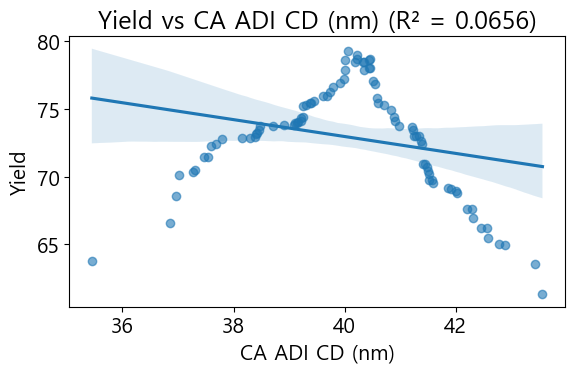

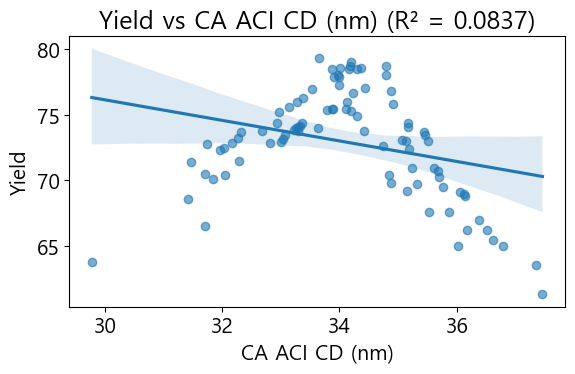

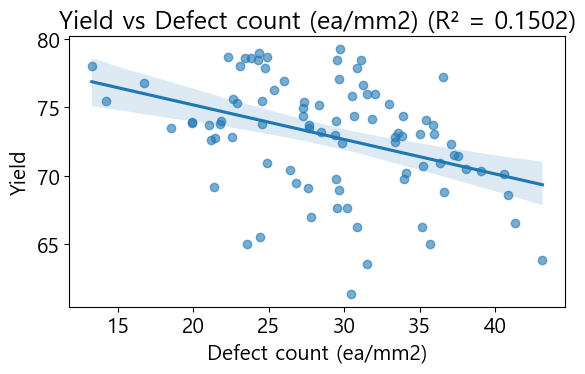

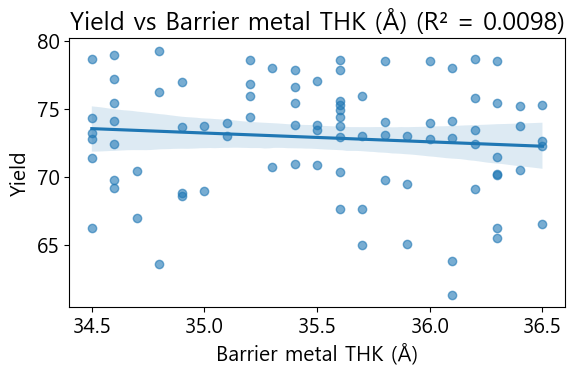

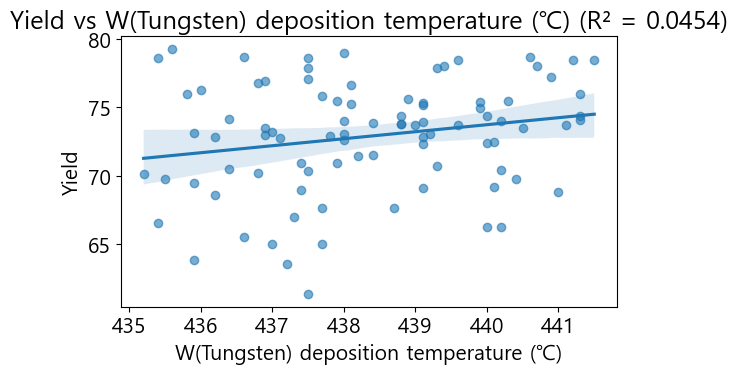

In [15]:
# 관계 확인할 변수 리스트
variables = [
    "CA ADI CD (nm)", "CA ACI CD (nm)", "Defect count (ea/mm2)", "Barrier metal THK (Å)",
    "W(Tungsten) deposition temperature (℃)"
]


# 산점도 + 회귀선 + R² 출력
for var in variables:
    X = df[[var]].values
    y = df["Yield (%)"].values

    model = LinearRegression()
    model.fit(X, y)
    y_pred = model.predict(X)
    r2 = r2_score(y, y_pred)

    plt.figure(figsize=(6, 4))
    sns.regplot(x=var, y="Yield (%)", data=df, scatter_kws={"alpha": 0.6})
    plt.title(f"Yield vs {var} (R² = {r2:.4f})")
    plt.xlabel(var)
    plt.ylabel("Yield")
    plt.tight_layout()
    plt.show()

In [16]:
import pandas as pd
df=pd.read_excel('반도체 공정설계 계측소자 Data를 활용한 소자 분석 및 수율향상 필수 실습 과제 2 raw data 파일.xlsx',sheet_name=1,skiprows=13,usecols='B:M')
df

,Lot ID,Wafer ID,평가 Concept,Yield (%),AVCC (%),LVCC (%),HVCC (%),CA ADI CD (nm),CA ACI CD (nm),Overlay 3sigma (nm),Current (nA),Resistance (ohm)
0,KZTWK.1,4,Reference,66.05,26.80,5.43,1.72,41.969217,36.641014,2.5,1562.3,130.091014
1,KZTWY.1,10,Reference,66.64,24.45,6.54,2.37,42.337234,36.046532,2.5,1487.5,132.236486
2,KZTWJ.1,5,Reference,70.02,21.48,5.21,3.29,41.494259,35.651032,0.2,237.0,134.638458
3,KZTWK.1,11,Reference,68.45,20.37,8.57,2.61,41.106086,35.624864,-2.9,244.8,132.866004
4,KZTWP.1,10,Reference,71.69,19.18,7.32,1.81,40.711277,35.592731,-0.2,138.5,138.605080
...,...,...,...,...,...,...,...,...,...,...,...,...
115,KZSCC.1,2,Etch 산포 개선 recipe 적용,78.89,10.31,7.28,3.52,38.120318,33.157288,2.5,205.4,143.759246
116,KZSBC.1,5,Etch 산포 개선 recipe 적용,80.52,9.76,5.52,4.20,38.723073,33.108189,-2.7,238.6,140.952036
117,KZSCC.1,3,Etch 산포 개선 recipe 적용,79.16,9.49,5.60,5.75,37.832152,32.919134,-1.8,240.5,141.761528
118,KZSBC.1,10,Etch 산포 개선 recipe 적용,77.59,9.68,10.33,2.40,38.436971,32.875586,1.5,221.2,150.060696


In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
matplotlib.rcParams['font.family'] = 'Malgun Gothic'
matplotlib.rcParams['font.size']=15
matplotlib.rcParams['axes.unicode_minus']=False

In [18]:
print(df.columns.tolist())

['Lot ID', 'Wafer ID', '평가 Concept', 'Yield (%)', 'AVCC (%)', 'LVCC (%)', 'HVCC (%)', 'CA ADI CD (nm)', 'CA ACI CD (nm)', 'Overlay 3sigma (nm)', 'Current (nA)', 'Resistance (ohm)']


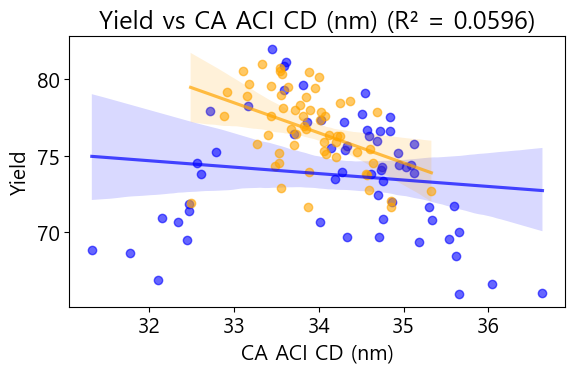

In [23]:
# 관계 확인할 변수 리스트
variables = [
     "CA ACI CD (nm)"

]
# 산점도 + 회귀선 + R² 출력
for var in variables:
    X = df[[var]].values
    y = df["Yield (%)"].values

    model = LinearRegression()
    model.fit(X, y)
    y_pred = model.predict(X)
    r2 = r2_score(y, y_pred)

    plt.figure(figsize=(6, 4))

    sns.regplot(x=var, y="Yield (%)", data=df.iloc[0:61], scatter_kws={"alpha": 0.6, "color": "blue"}, line_kws={"color": "blue", "alpha": 0.7})
    sns.regplot(x=var, y="Yield (%)", data=df.iloc[61:121], scatter_kws={"alpha": 0.6, "color": "orange"}, line_kws={"color": "orange", "alpha": 0.7})
    plt.title(f"Yield vs {var} (R² = {r2:.4f})")
    plt.xlabel(var)
    plt.ylabel("Yield")
    plt.tight_layout()
    plt.show()
